# *Pipeline* for the correlation functions $\xi_+(\theta)$, $\xi_-(\theta)$

This notebook works by the means which the correlation functions are computed (i.e., as a channel, or "*pipeline*"), fed by the basic cosmological dependent **INPUTS** as $\Omega_M, \ W(\chi), \ P_{L}(k)$ (from class).

## Libraries

In [1]:
import WLnu as M
import numpy as np

# Input data

In [2]:
######## INPUTS ########
OmegaM_in=0.3
zTableChi_in = np.linspace(0, 20, num=201)

# Inputs for class: absolute neutrino masses in eV
M_nu0 = 0.0; M_nu1 = 0.06; M_nu2 = 0.1; M_nu3 = 0.2; M_nu4 = 0.4; M_nuKatrin = 0.8
Mnu_array = [M_nu0, M_nu1, M_nu2, M_nu3, M_nu4, M_nuKatrin]

inputpkT_list = []

for i in range(len(Mnu_array)):
    inputpkT = M.class_module(Mnu_array[i])
    inputpkT_list.append(inputpkT)

# Main (all modules)

### 4) Module of Convergence Power Spectrum

**Input:** PkT (Plin from Class). **Output:** *CkappaT_kappaPS*

$$
    C_\kappa(l) = \int_0^\infty d\chi \frac{q(\chi)q(\chi)}{\chi^2} P_{\delta \delta} \left( k= \frac{1}{\chi}, \chi \right)
$$

### 5) Module **Correlation functions** $\normalsize{\xi_+}$ and $\normalsize{\xi_-}$ Using Method *FFTLog*

#### Input: pkT

#### Outpus: xiPlusT_FFT_output, xiMinusT_FFT_output
$$
    \xi_+ (\theta) = \int_0^\infty \frac{\ell d\ell}{2\pi} J_0 (\ell \theta) C_\kappa (\ell), \qquad \xi_- (\theta) = \int_0^\infty \frac{\ell d\ell}{2\pi} J_4 (\ell \theta) C_\kappa (\ell).
$$

### 7) Nonlinear regime
We want to use the approximation

$$
    P_\text{1-loop}^\text{ aprox}(k) = \left(\frac{P_L(k)}{P_L^\text{ ref}(k)}\right)^2  P_\text{1-loop}^\text{ ref}(k),
$$

where $P_L^\text{ ref}(k)$ and $P_\text{1-loop}^\text{ ref}(k)$ are the PS obtained by CLASS and an input datafile (*pknl_mass00z0.dat*), respectively.

         *** This is the 0 -th experiment with M𝜈 = 0.0  eV *** 
 

The time used to calculate all the chi[z] values (integrate) is: 0.0006914138793945312 s. 

The time used to compute the Convergence PS integral ("handly") was  0.24530887603759766 s


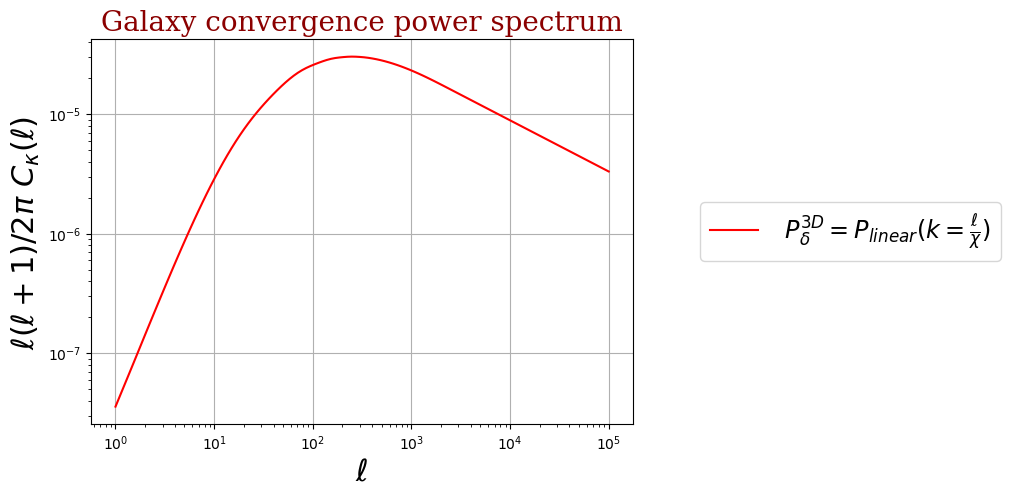

The time used to calculate A_m terms is 0.46281003952026367 s.


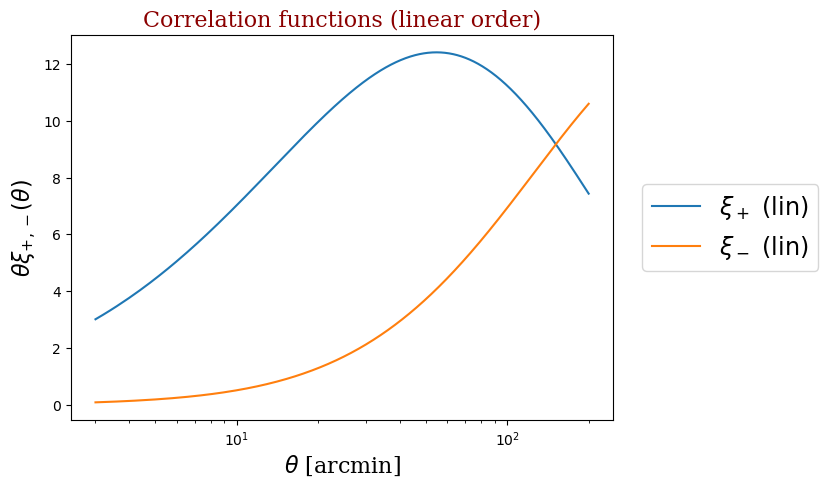

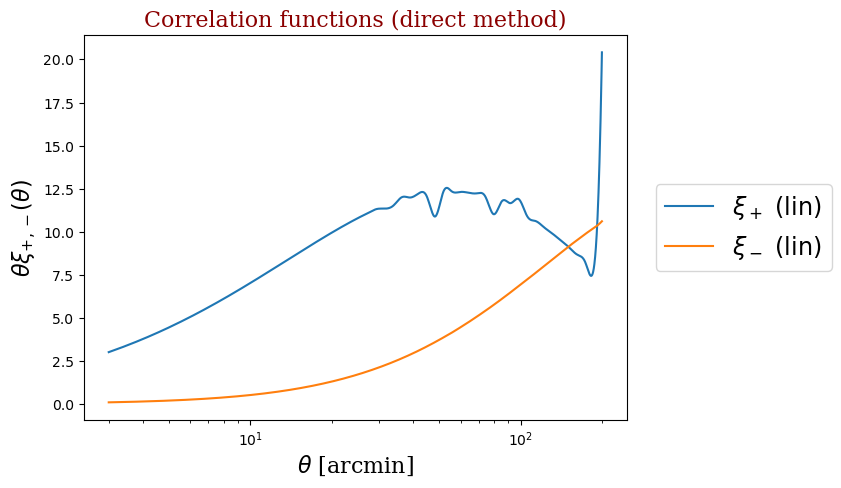

Time used (direct):  1.5169150829315186 s 
 
 



In [14]:
""" Choose a method as the last argument of 'allmodules' function 

1 = FFTLog
2 = Direct integration """

for i in range(len(inputpkT_list)):
    print("         *** This is the", i, "-th experiment with M𝜈 =", Mnu_array[i], " eV *** \n \n")
    M.allmodules(OmegaM_in, zTableChi_in, inputpkT_list[i], 1) # <-- method